In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("C:\\Users\\ASUS\\Downloads\\Triple Exponential Smoothing .xls")
data.head()

,Date,Omellette
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [4]:
#SMA Plotting
sma10 =data['Omellette'].rolling(window=10).mean()
sma12 =data['Omellette'].rolling(window=12).mean()
sma15 =data['Omellette'].rolling(window=15).mean()

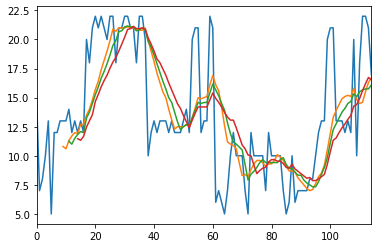

In [5]:
data['Omellette'].plot()
sma10.plot()
sma12.plot()
sma15.plot()

In [12]:
#WMA Plotting
weights = np.arange(1,13)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
wma12=data['Omellette'].rolling(12).apply(lambda sales : np.dot(sales,weights)/weights.sum(),raw=True)

In [19]:
wma12.head(20)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11    11.871795
12    11.987179
13    12.294872
14    12.371795
15    12.551282
16    12.538462
17    13.769231
18    14.500000
19    15.615385
Name: Omellette, dtype: float64

In [22]:
data['WMA12']=np.round(wma12,decimals=3)
data[['Omellette','WMA12']].head(25)

,Omellette,WMA12
0,15,NaN
1,7,NaN
2,8,NaN
3,10,NaN
4,13,NaN
5,5,NaN
6,12,NaN
7,12,NaN
8,13,NaN
9,13,NaN


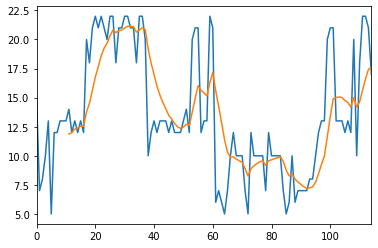

In [20]:
data['Omellette'].plot()
wma12.plot()

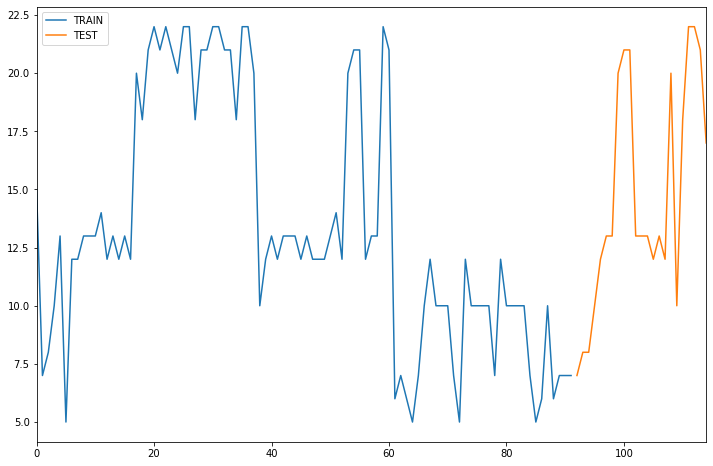

In [61]:
train_data = data.iloc[:92]
test_data = data.iloc[92:]
train_data['Omellette'].plot(legend=True,label = 'TRAIN')
test_data['Omellette'].plot(legend=True,label='TEST',figsize=(12,8))

In [82]:
#Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 4
alpha1 = 0.2
alpha2= 0.5
alpha3= 0.85
model1 = SimpleExpSmoothing(train_data['Omellette']).fit(smoothing_level=alpha1)
test_prediction1 = model1.forecast(23).rename('SES Forecast 1')
model2 = SimpleExpSmoothing(train_data['Omellette']).fit(smoothing_level=alpha2)
test_prediction2 = model2.forecast(23).rename('SES Forecast 2')
model3 = SimpleExpSmoothing(train_data['Omellette']).fit(smoothing_level=alpha3)
test_prediction3 = model3.forecast(23).rename('SES Forecast 3')



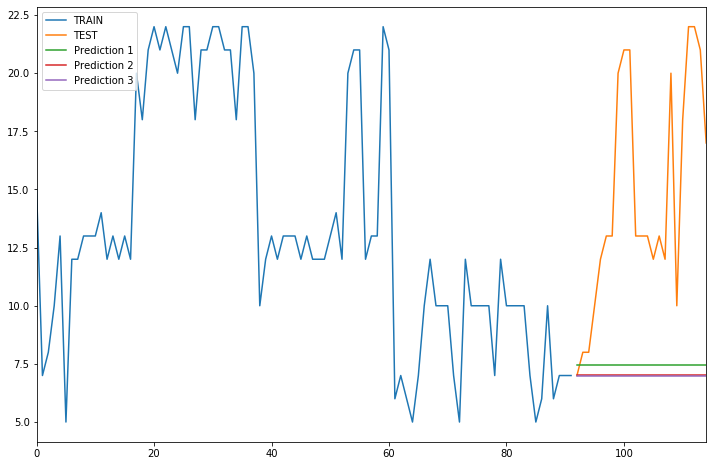

In [83]:
train_data['Omellette'].plot(legend = True, label='TRAIN')
test_data['Omellette'].plot(legend=True,label='TEST',figsize=(12,8))
test_prediction1.plot(legend = True, label = 'Prediction 1')
test_prediction2.plot(legend = True, label = 'Prediction 2')
test_prediction3.plot(legend = True, label = 'Prediction 3')

In [84]:
from sklearn.metrics import mean_squared_error
rms_error1 = np.sqrt(mean_squared_error(test_data['Omellette'], test_prediction1))
print("RMS Error for 0.2 is: ", rms_error1)
rms_error2 = np.sqrt(mean_squared_error(test_data['Omellette'], test_prediction2))
print("RMS Error for 0.5 is: ", rms_error2)
rms_error3 = np.sqrt(mean_squared_error(test_data['Omellette'], test_prediction3))
print("RMS Error for 0.85 is: ", rms_error3)

mse_error1 = mean_squared_error(test_data['Omellette'], test_prediction1)
print("MSE Error for 0.2 is: ", mse_error1)
mse_error2 = mean_squared_error(test_data['Omellette'], test_prediction2)
print("MSE Error for 0.5 is: ", mse_error2)
mse_error3 = mean_squared_error(test_data['Omellette'], test_prediction3)
print("MSE Error for 0.85 is: ", mse_error3)

Error1 = np.sum(np.abs(np.subtract(test_data['Omellette'], test_prediction1)))
Error2 = np.sum(np.abs(np.subtract(test_data['Omellette'], test_prediction2)))
Error3 = np.sum(np.abs(np.subtract(test_data['Omellette'], test_prediction3)))
Average = np.sum(test_data['Omellette'])
MAPE1 = Error1/Average
MAPE2 = Error2/Average
MAPE3 = Error3/Average
print("MAPE Error for 0.2 is: ", MAPE1)
print("MAPE Error for 0.5 is: ", MAPE2)
print("MAPE Error for 0.85 is: ", MAPE3)

RMS Error for 0.2 is:  8.722259796271187
RMS Error for 0.5 is:  9.09804190983337
RMS Error for 0.85 is:  9.109458446218735
MSE Error for 0.2 is:  76.07781595364868
MSE Error for 0.5 is:  82.77436659308444
MSE Error for 0.85 is:  82.98223318338584
MAPE Error for 0.2 is:  0.4967045053416088
MAPE Error for 0.5 is:  0.5243441721253089
MAPE Error for 0.85 is:  0.5251864364341755


In [86]:
#DES
from statsmodels.tsa.holtwinters import Holt
span=4
alpha1 = 0.2
alpha2= 0.5
alpha3= 0.85
beta = 0.05
model1 = Holt(train_data['Omellette']).fit(smoothing_level=alpha1,smoothing_slope = beta)
test_prediction1 = model1.forecast(23).rename('SES Forecast 1')
model2 = Holt(train_data['Omellette']).fit(smoothing_level=alpha2,smoothing_slope = beta)
test_prediction2 = model2.forecast(23).rename('SES Forecast 2')
model3 = Holt(train_data['Omellette']).fit(smoothing_level=alpha3,smoothing_slope = beta)
test_prediction3 = model3.forecast(23).rename('SES Forecast 3')

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


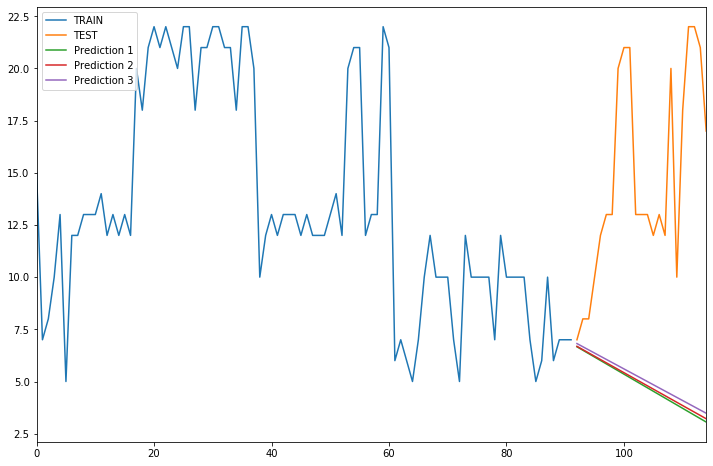

In [87]:
train_data['Omellette'].plot(legend = True, label='TRAIN')
test_data['Omellette'].plot(legend=True,label='TEST',figsize=(12,8))
test_prediction1.plot(legend = True, label = 'Prediction 1')
test_prediction2.plot(legend = True, label = 'Prediction 2')
test_prediction3.plot(legend = True, label = 'Prediction 3')
#only trend no seasonality here so prediction in single line

In [88]:
from sklearn.metrics import mean_squared_error
rms_error1 = np.sqrt(mean_squared_error(test_data['Omellette'], test_prediction1))
print("RMS Error for 0.2 is: ", rms_error1)
rms_error2 = np.sqrt(mean_squared_error(test_data['Omellette'], test_prediction2))
print("RMS Error for 0.5 is: ", rms_error2)
rms_error3 = np.sqrt(mean_squared_error(test_data['Omellette'], test_prediction3))
print("RMS Error for 0.85 is: ", rms_error3)

mse_error1 = mean_squared_error(test_data['Omellette'], test_prediction1)
print("MSE Error for 0.2 is: ", mse_error1)
mse_error2 = mean_squared_error(test_data['Omellette'], test_prediction2)
print("MSE Error for 0.5 is: ", mse_error2)
mse_error3 = mean_squared_error(test_data['Omellette'], test_prediction3)
print("MSE Error for 0.85 is: ", mse_error3)

Error1 = np.sum(np.abs(np.subtract(test_data['Omellette'], test_prediction1)))
Error2 = np.sum(np.abs(np.subtract(test_data['Omellette'], test_prediction2)))
Error3 = np.sum(np.abs(np.subtract(test_data['Omellette'], test_prediction3)))
Average = np.sum(test_data['Omellette'])
MAPE1 = Error1/Average
MAPE2 = Error2/Average
MAPE3 = Error3/Average
print("MAPE Error for 0.2 is: ", MAPE1)
print("MAPE Error for 0.5 is: ", MAPE2)
print("MAPE Error for 0.85 is: ", MAPE3)

RMS Error for 0.2 is:  11.322428709464186
RMS Error for 0.5 is:  11.229705914164015
RMS Error for 0.85 is:  11.04296111938358
MSE Error for 0.2 is:  128.1973918808988
MSE Error for 0.5 is:  126.10629491861023
MSE Error for 0.85 is:  121.94699028421745
MAPE Error for 0.2 is:  0.6702200941201409
MAPE Error for 0.5 is:  0.6641368685156736
MAPE Error for 0.85 is:  0.6506685279637451


In [89]:
#TSE
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model=ExponentialSmoothing(train_data['Omellette'],trend='add',seasonal='add',seasonal_periods=30).fit()
test_predictions=triple_model.forecast(23).rename('TES Fprecast')

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


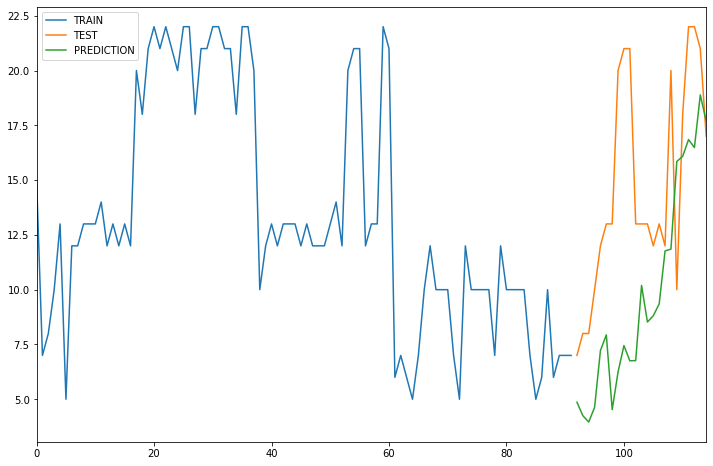

In [90]:
train_data['Omellette'].plot(legend = True, label='TRAIN')
test_data['Omellette'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
#Here there is seasonality

In [91]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data['Omellette'],test_predictions))
print("RMSE is ",rms_error)
mse_error=mean_squared_error(test_data['Omellette'],test_predictions)
print("MSE is ",mse_error)
Error = np.sum(np.abs(np.subtract(test_data['Omellette'],test_predictions)))
Average = np.sum(test_data['Omellette'])
MAPE = Error/Average
print("MAPE is ", MAPE)

RMSE is  6.646993716829036
MSE is  44.18252547156468
MAPE is  0.3691208173522393
